In [2]:
# Pasting these here for easier access

import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolacors
import pickle
from tqdm import tqdm  # For progress bar
from multiprocessing import Pool, cpu_count
import os
import sys
import time
import datetime 

In [3]:
# Checking if we are in the correct directory
#wd()

# Define the range for weight groups
min_weight = 6
max_weight = 60

# Define pmax_art values
weight_values = list(range(min_weight, max_weight+1, 1))
print(weight_values)
print(len(weight_values))

#Saving EC50_lum for future reference
np.savetxt('pkpd_AL_weight_calibration_weight_range_01.txt', weight_values, delimiter=',', fmt='%5f')

# Initialize a grid to store the clearance rates
trial_efficacy = np.zeros(len(weight_values))

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
55


In [6]:
def run_simulation(idx, weight):
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "--pmax_artemether","0.999999",
        "--pmax_lum","0",
        "-n", "1000",
        "--weight", str(weight),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split(',') for line in lines_weight], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10)].shape[0]
        total_patients = df_weight['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {weight}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, weight_values[i]) for i in range(len(weight_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, efficacy in results:
    trial_efficacy[idx] = efficacy

# Create a DataFrame with pmax_values and clearance_rates
df = pd.DataFrame({
    'weight': weight_values,
    'efficacy': trial_efficacy
})

# Save the DataFrame to a pickle file
0.
df.to_pickle("pkpd_AL_weight_calibration_artemether_patient_blood_volume.pyobj")

# Save the DataFrame to a CSV file
df.to_csv("pkpd_AL_weight_calibration_artemether_patient_blood_volume.csv", index=False)

print("DataFrame saved as pickle and CSV files successfully.")

Running simulations: 100%|██████████| 55/55 [03:12<00:00,  3.49s/it]  

DataFrame saved as pickle and CSV files successfully.


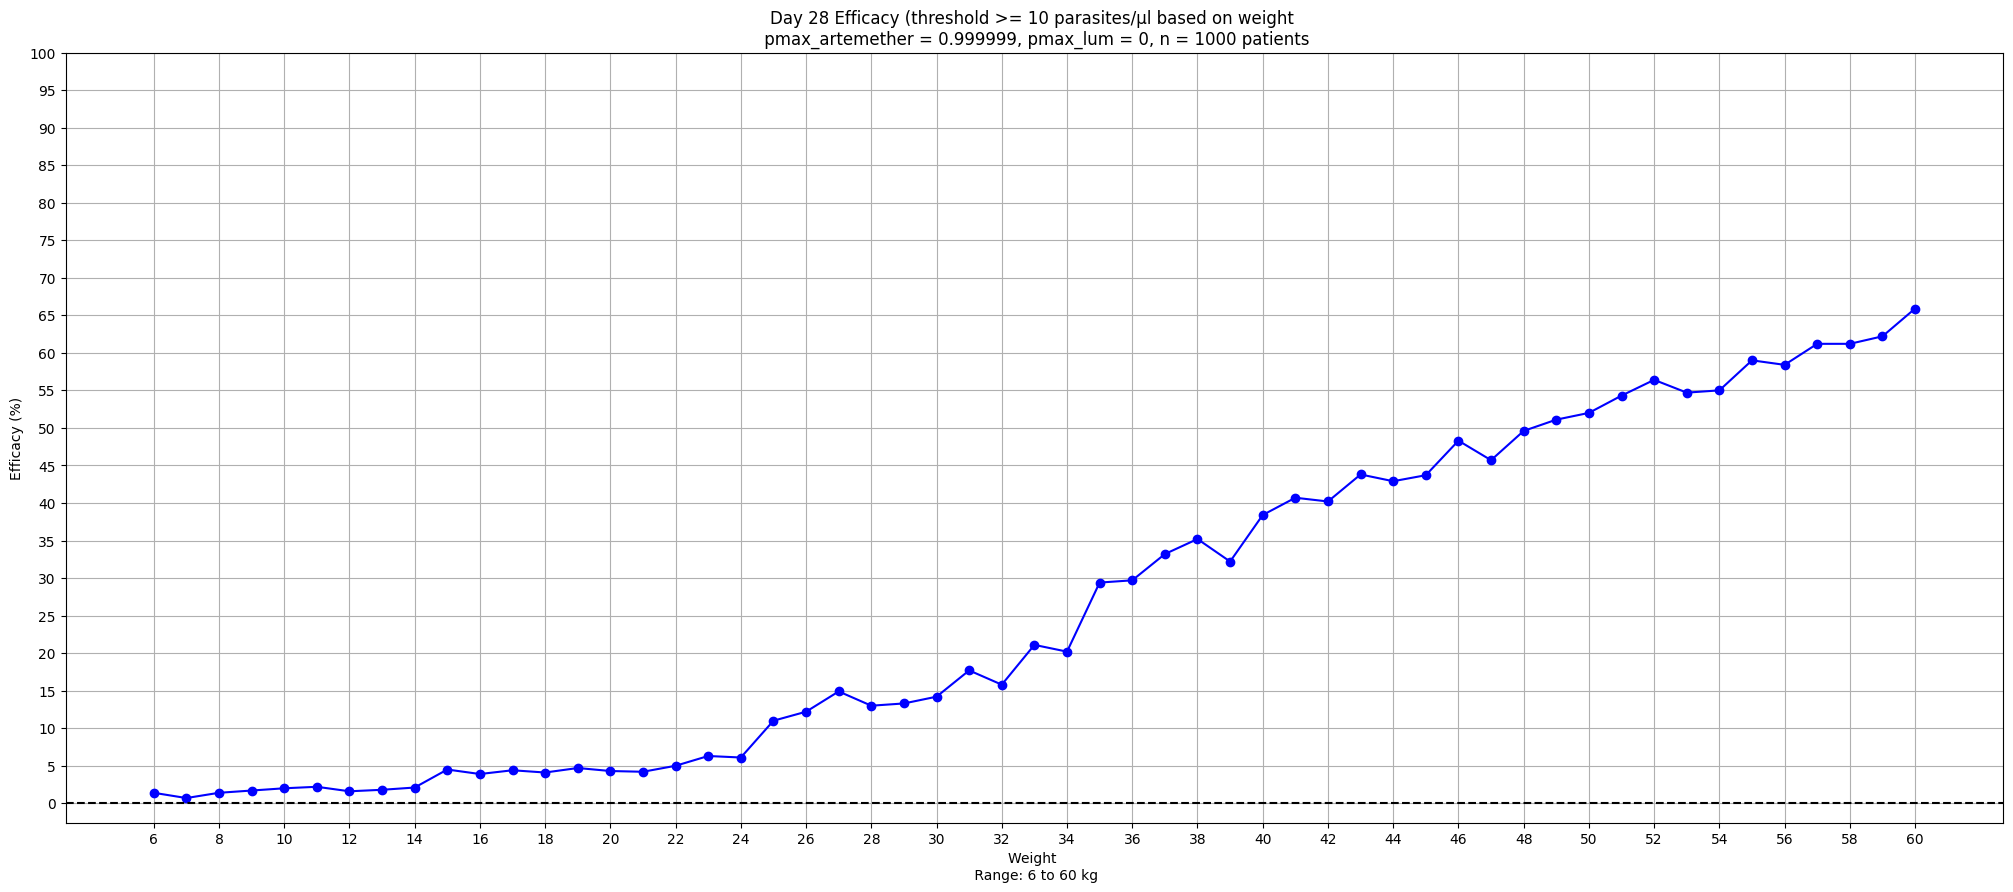

In [7]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(weight_values, trial_efficacy, marker='o', linestyle='-', color='b')
plt.xlabel('Weight \n Range: 6 to 60 kg')
plt.ylabel('Efficacy (%)')
plt.title("Day 28 Efficacy (threshold >= 10 parasites/μl based on weight \n pmax_artemether = 0.999999, pmax_lum = 0, n = 1000 patients")
plt.grid(True)
plt.xticks(np.arange(min(weight_values), max(weight_values)+1, 2))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y=0
plt.savefig("pkpd_AL_weight_calibration_artemether_patient_blood_volume.png")  # Save the plot as a PNG file
plt.show()

In [8]:
def run_simulation(idx, weight):
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "--pmax_artemether","0",
        "-n", "1000",
        "--weight", str(weight),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split(',') for line in lines_weight], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10)].shape[0]
        total_patients = df_weight['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {weight}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, weight_values[i]) for i in range(len(weight_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, efficacy in results:
    trial_efficacy[idx] = efficacy

# Create a DataFrame with pmax_values and clearance_rates
df = pd.DataFrame({
    'weight': weight_values,
    'efficacy': trial_efficacy
})

# Save the DataFrame to a pickle file
0.
df.to_pickle("pkpd_AL_weight_calibration_lumefantrine_patient_blood_volume.pyobj")

# Save the DataFrame to a CSV file
df.to_csv("pkpd_AL_weight_calibration_lumefantrine_patient_blood_volume.csv", index=False)

print("DataFrame saved as pickle and CSV files successfully.")

Running simulations: 100%|██████████| 55/55 [03:18<00:00,  3.61s/it]  

DataFrame saved as pickle and CSV files successfully.


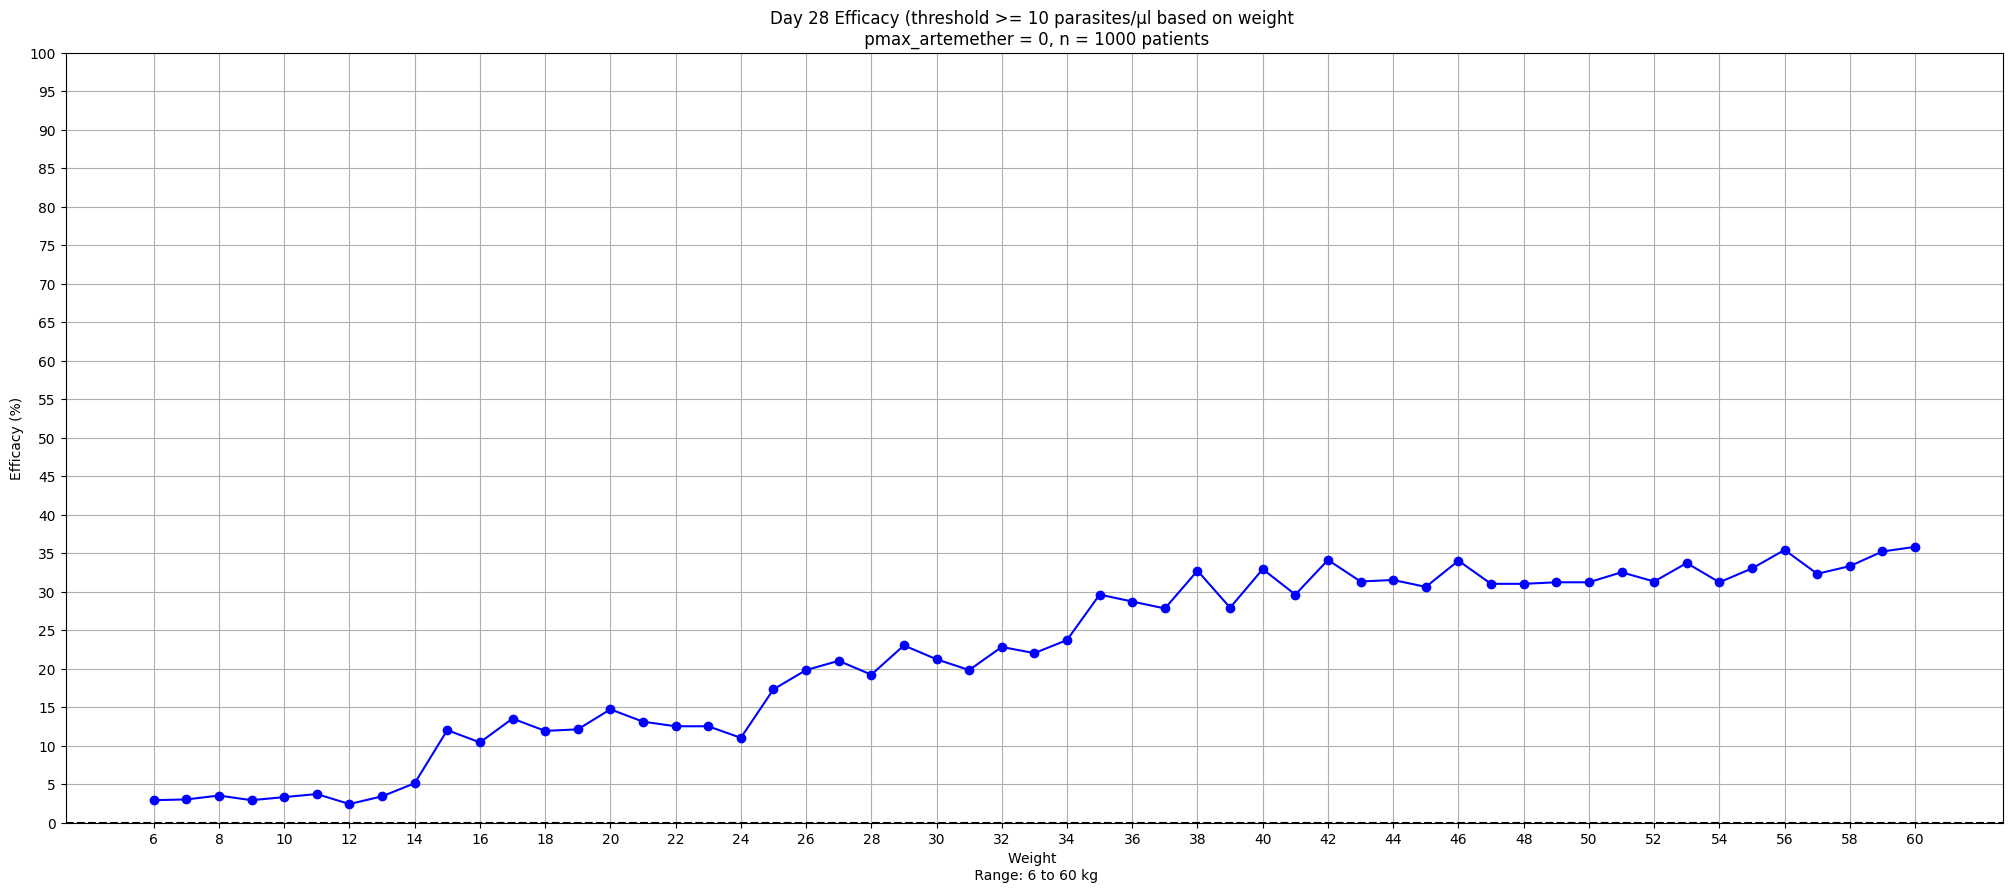

In [9]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(weight_values, trial_efficacy, marker='o', linestyle='-', color='b')
plt.xlabel('Weight \n Range: 6 to 60 kg')
plt.ylabel('Efficacy (%)')
plt.title("Day 28 Efficacy (threshold >= 10 parasites/μl based on weight \n pmax_artemether = 0, n = 1000 patients")
plt.grid(True)
plt.xticks(np.arange(min(weight_values), max(weight_values)+1, 2))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  
plt.savefig("pkpd_AL_weight_calibration_lumefantrine_patient_blood_volume.png")  # Save the plot as a PNG file
plt.show()

In [10]:
def run_simulation(idx, weight):
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "--pmax_artemether","0.999999",
        "-n", "1000",
        "--weight", str(weight),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split(',') for line in lines_weight], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10)].shape[0]
        total_patients = df_weight['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {weight}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, weight_values[i]) for i in range(len(weight_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, efficacy in results:
    trial_efficacy[idx] = efficacy

# Create a DataFrame with pmax_values and clearance_rates
df = pd.DataFrame({
    'weight': weight_values,
    'efficacy': trial_efficacy
})

# Save the DataFrame to a pickle file
0.
df.to_pickle("pkpd_AL_weight_calibration_AL_patient_blood_volume.pyobj")

# Save the DataFrame to a CSV file
df.to_csv("pkpd_AL_weight_calibration_AL_patient_blood_volume.csv", index=False)

print("DataFrame saved as pickle and CSV files successfully.")

Running simulations: 100%|██████████| 55/55 [03:12<00:00,  3.49s/it]  

DataFrame saved as pickle and CSV files successfully.


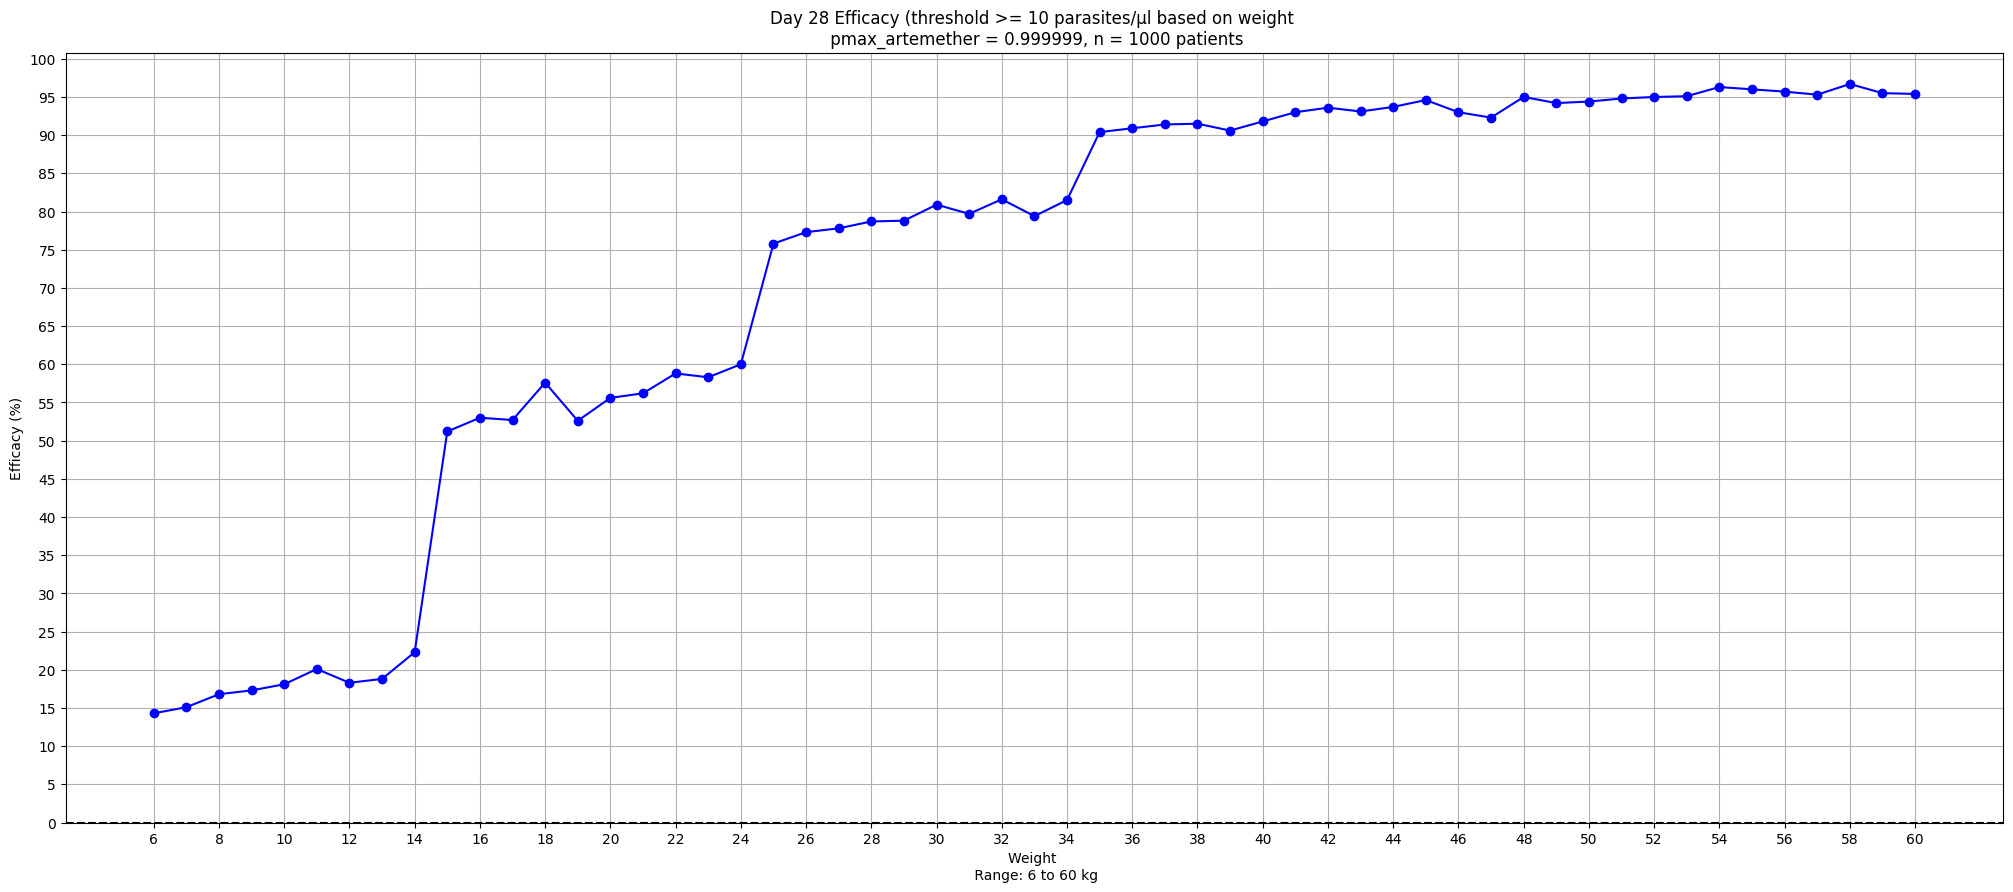

In [11]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(weight_values, trial_efficacy, marker='o', linestyle='-', color='b')
plt.xlabel('Weight \n Range: 6 to 60 kg')
plt.ylabel('Efficacy (%)')
plt.title("Day 28 Efficacy (threshold >= 10 parasites/μl based on weight \n pmax_artemether = 0.999999, n = 1000 patients")
plt.grid(True)
plt.xticks(np.arange(min(weight_values), max(weight_values)+1, 2))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y=0
plt.savefig("pkpd_AL_weight_calibration_AL_patient_blood_volume.png")  # Save the plot as a PNG file
plt.show()

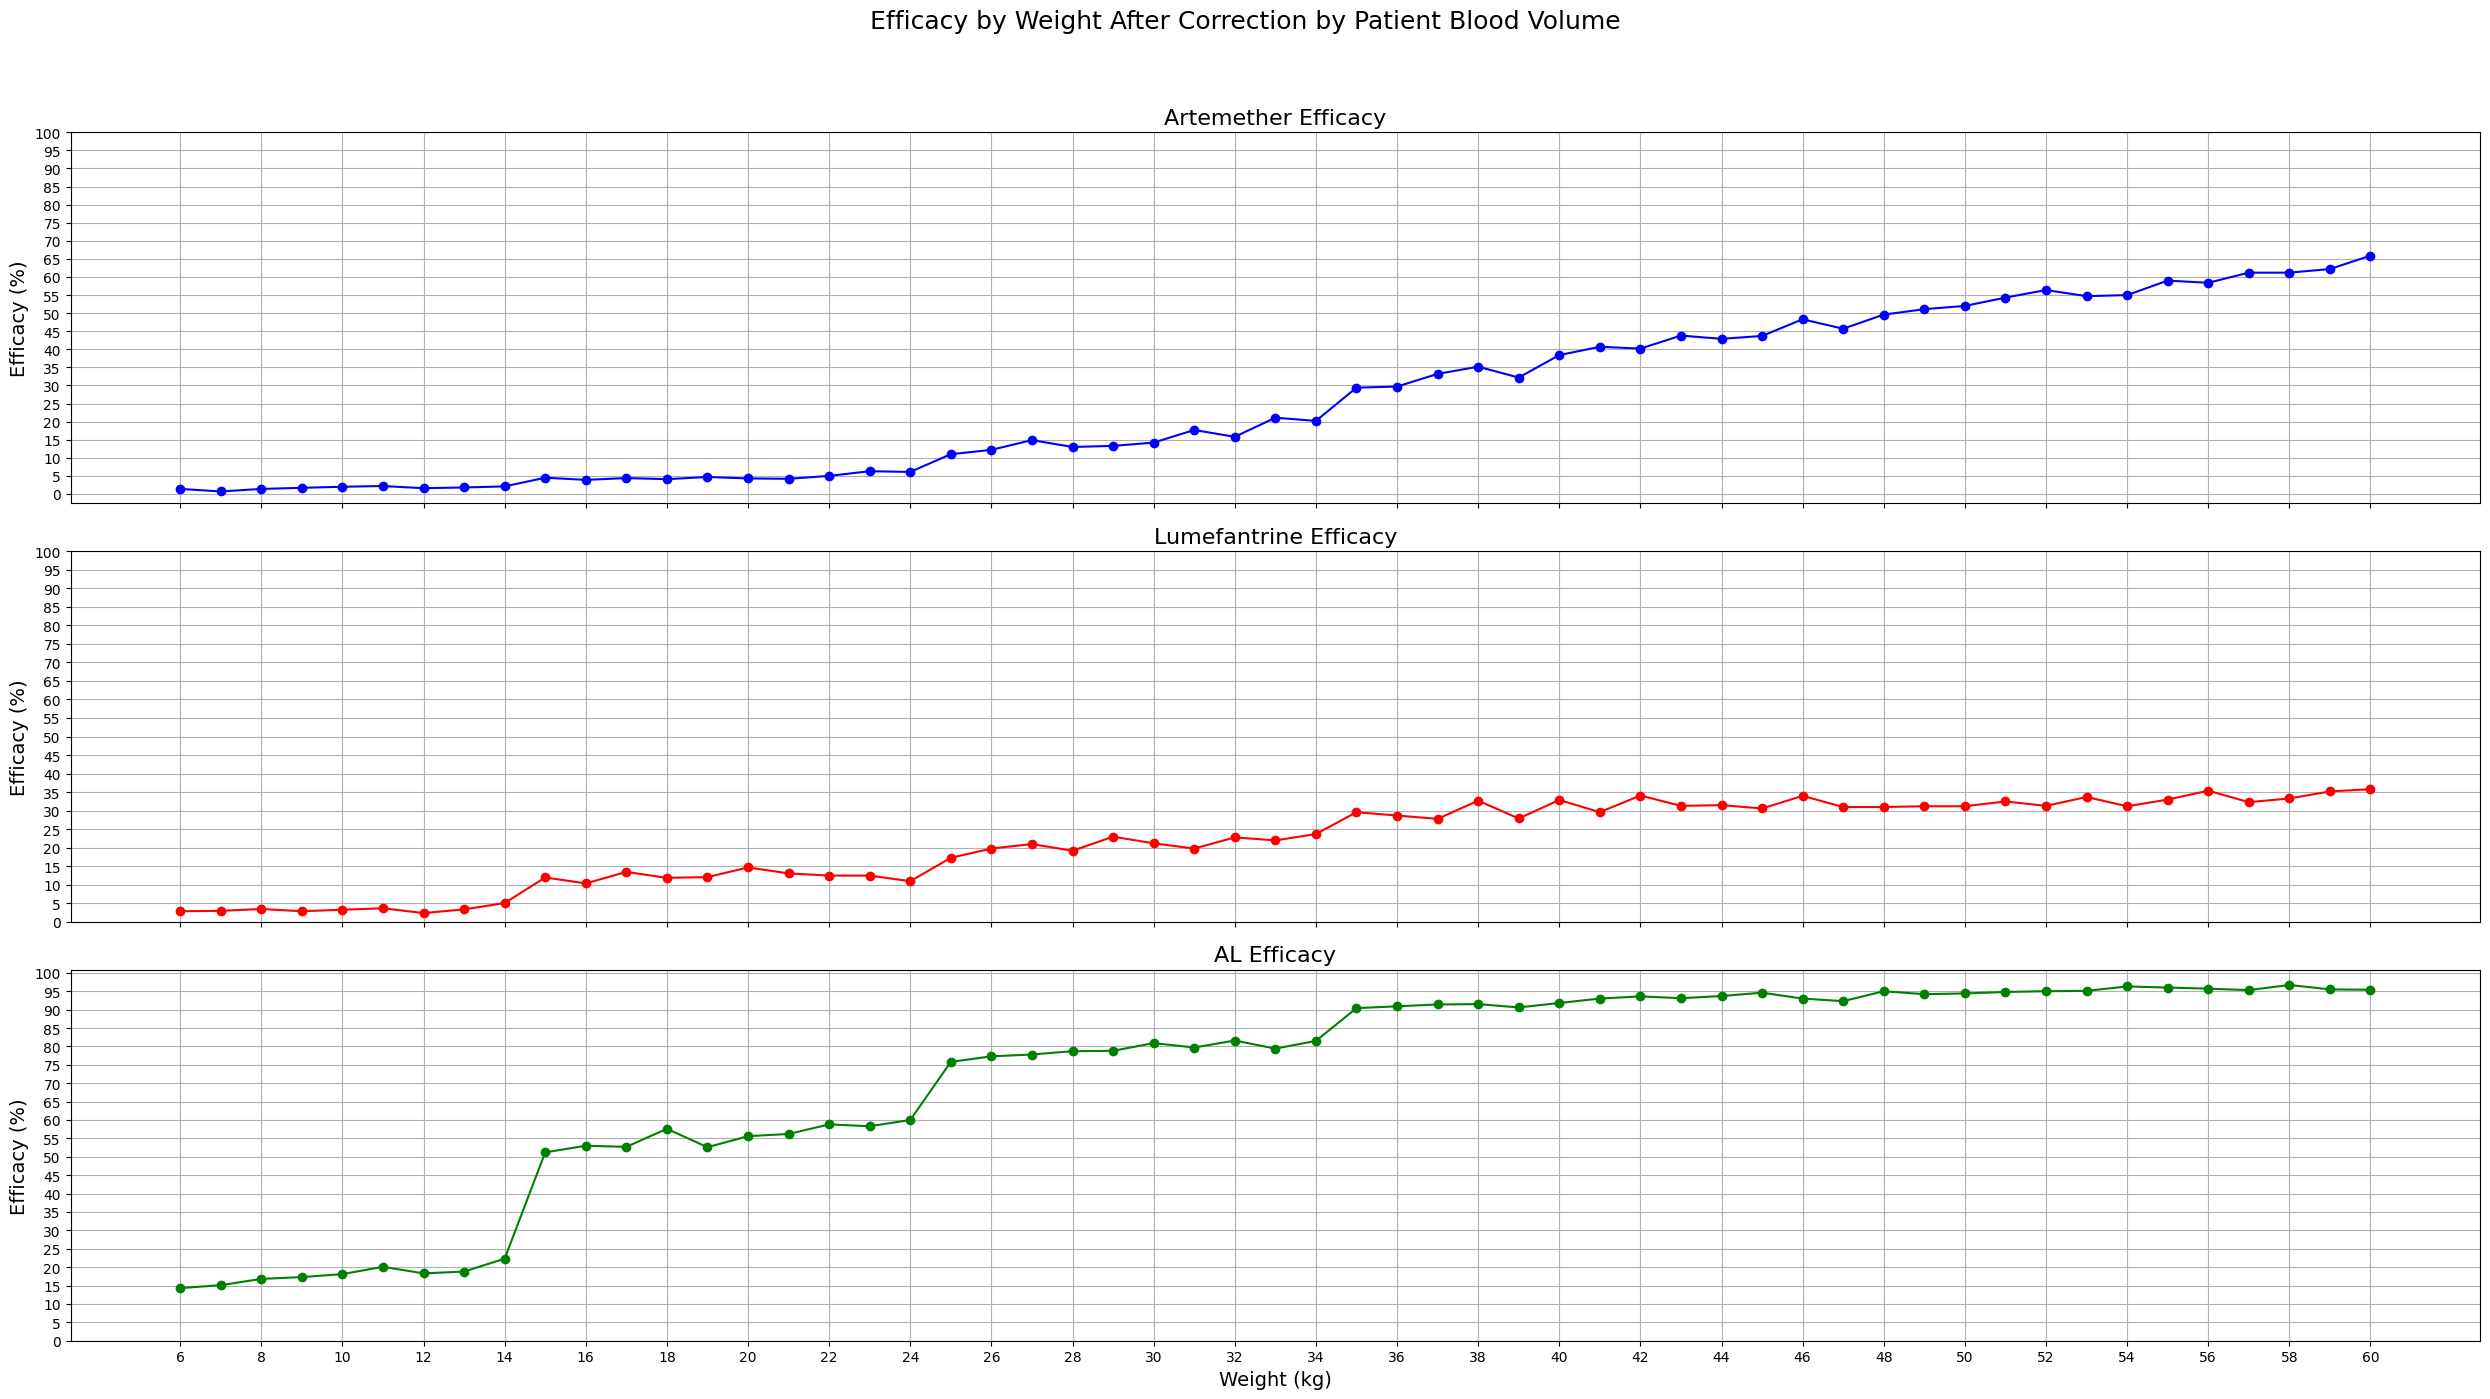

In [16]:
# Loading artemether, lumefantrine, and AL dataframes

df_weight_art = pd.read_pickle("pkpd_AL_weight_calibration_artemether_patient_blood_volume.pyobj")
df_weight_lum = pd.read_pickle("pkpd_AL_weight_calibration_lumefantrine_patient_blood_volume.pyobj")
df_weight_AL = pd.read_pickle("pkpd_AL_weight_calibration_AL_patient_blood_volume.pyobj")

# Plotting the weight vs efficacy for artemether, lumefantrine, and AL as a 3x1 subplot
fig, ax = plt.subplots(3, 1, figsize=(25, 15), sharex=True)
# Plotting artemether efficacy
ax[0].plot(df_weight_art['weight'], df_weight_art['efficacy'], marker='o', linestyle='-', color='b')
ax[0].set_title("Artemether Efficacy", fontsize=16)
ax[0].set_ylabel('Efficacy (%)', fontsize=14)
ax[0].grid(True)
ax[0].set_xticks(np.arange(min(weight_values), max(weight_values)+1, 2))  # Adjust tick marks if necessary
ax[0].set_yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
# Plotting lumefantrine efficacy
ax[1].plot(df_weight_lum['weight'], df_weight_lum['efficacy'], marker='o', linestyle='-', color='r')
ax[1].set_title("Lumefantrine Efficacy", fontsize=16)
ax[1].set_ylabel('Efficacy (%)', fontsize=14)
ax[1].grid(True)
ax[1].set_xticks(np.arange(min(weight_values), max(weight_values)+1, 2))  # Adjust tick marks if necessary
ax[1].set_yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
# Plotting AL efficacy
ax[2].plot(df_weight_AL['weight'], df_weight_AL['efficacy'], marker='o', linestyle='-', color='g')
ax[2].set_title("AL Efficacy", fontsize=16)
ax[2].set_xlabel('Weight (kg)', fontsize=14)
ax[2].set_ylabel('Efficacy (%)', fontsize=14)
ax[2].grid(True)
ax[2].set_xticks(np.arange(min(weight_values), max(weight_values)+1, 2))  # Adjust tick marks if necessary
ax[2].set_yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
# Set common x-axis label
#fig.text(0.5, 0.04, 'Weight (kg)', ha='center', fontsize=16)
# Set common title
fig.suptitle('Efficacy by Weight After Correction by Patient Blood Volume', fontsize=18)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to fit common x-label
plt.savefig("pkpd_AL_weight_calibration_all_efficacies_patient_blood_volume.png")  # Save the plot as a PNG file
plt.show()



In [4]:
def run_simulation(idx, weight):
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "--pmax_artemether","0.999999",
        "-n", "1000",
        "--weight", str(weight),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split(',') for line in lines_weight], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10)].shape[0]
        total_patients = df_weight['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {weight}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, weight_values[i]) for i in range(len(weight_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, efficacy in results:
    trial_efficacy[idx] = efficacy

# Create a DataFrame with pmax_values and clearance_rates
df = pd.DataFrame({
    'weight': weight_values,
    'efficacy': trial_efficacy
})

# Save the DataFrame to a pickle file
0.
df.to_pickle("pkpd_AL_weight_calibration_AL_lumfantrine_CentralVolumeOfDistribution.pyobj")

# Save the DataFrame to a CSV file
df.to_csv("pkpd_AL_weight_calibration_AL_lumfantrine_CentralVolumeOfDistribution.csv", index=False)

print("DataFrame saved as pickle and CSV files successfully.")

Running simulations: 100%|██████████| 55/55 [03:17<00:00,  3.59s/it]  

DataFrame saved as pickle and CSV files successfully.


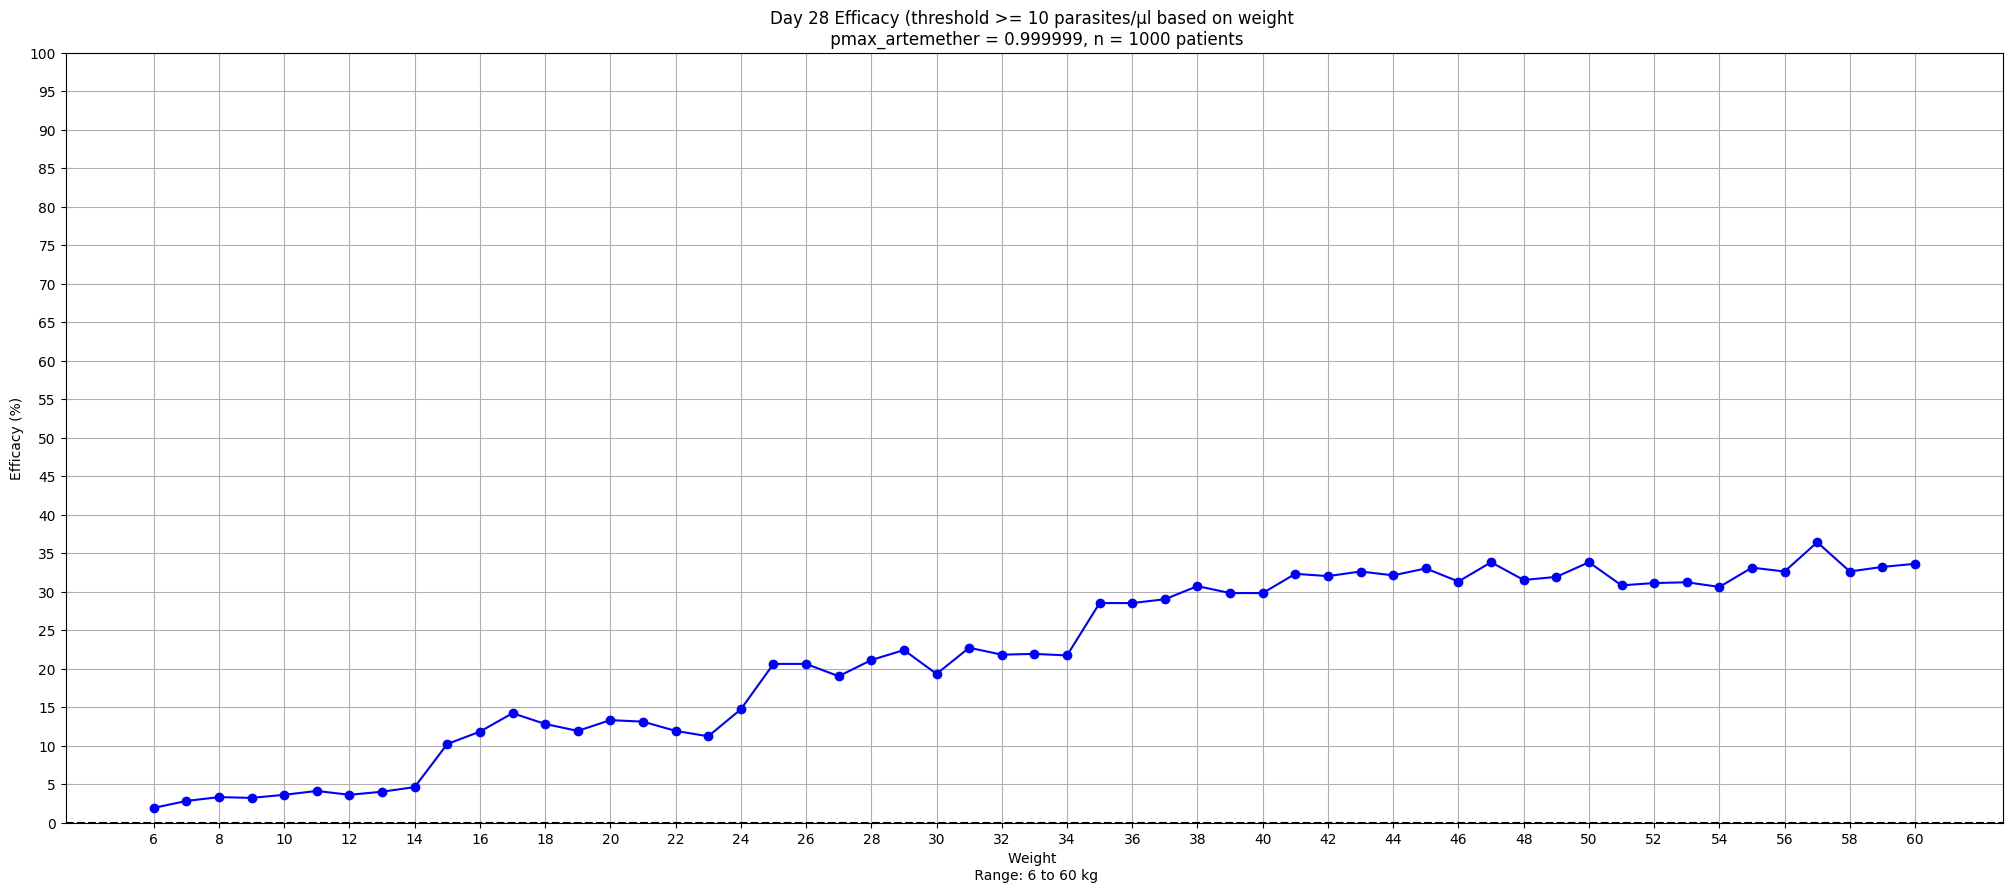

In [5]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(weight_values, trial_efficacy, marker='o', linestyle='-', color='b')
plt.xlabel('Weight \n Range: 6 to 60 kg')
plt.ylabel('Efficacy (%)')
plt.title("Day 28 Efficacy (threshold >= 10 parasites/μl based on weight \n pmax_artemether = 0.999999, n = 1000 patients")
plt.grid(True)
plt.xticks(np.arange(min(weight_values), max(weight_values)+1, 2))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y=0
plt.savefig("pkpd_AL_weight_calibration_AL_lumfantrine_CentralVolumeOfDistribution.png")  # Save the plot as a PNG file
plt.show()